In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

from pypvcell.solarcell import SQCell,MJCell,DBCell
from pypvcell.illumination import Illumination,load_blackbody
from pypvcell.photocurrent import gen_step_qe

/Users/kanhua/Dropbox/Programming/python_distribution_try/pypvcell_p3_lw/lib/python3.5/site-packages/matplotlib/cbook.py:128: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the matplotlib toolkit finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Reference spectrum: Blackbody at 6000K

In [5]:
one_sun_ill=load_blackbody(T=6000,normalize_to=1000)
one_sun_ill.rsum()

999.99999999999989

### 1J 1.13 eV

In [10]:
sq_cell = SQCell(eg=1.31, cell_T=300, n_c=1, n_s=1)
sq_cell.set_input_spectrum(input_spectrum=one_sun_ill)
print(sq_cell.get_eta())

0.31561963736


### 2J 1.87/0.98 eV

In [11]:
s1 = SQCell(eg=1.88, cell_T=300, n_c=1, n_s=1)
s2 = SQCell(eg=0.98, cell_T=300, n_c=1, n_s=1)
mj=MJCell([s1,s2])
mj.set_input_spectrum(input_spectrum=one_sun_ill)
print(mj.get_eta())
print(mj.get_subcell_jsc())

0.374620297607
[-176.85004312 -283.66597477]


In [12]:
#mechanical stack
mj=MJCell([s1,s2],connect='MS')
mj.set_input_spectrum(input_spectrum=one_sun_ill)
print(mj.get_eta())
print(mj.get_subcell_jsc())

0.42625187943
[-176.85004312 -283.66597477]


### 3J  2.26/1.45/0.83 eV 

In [13]:
s1 = SQCell(eg=2.26, cell_T=300, n_c=1, n_s=1)
s2 = SQCell(eg=1.44, cell_T=300, n_c=1, n_s=1)
s3 = SQCell(eg=0.82, cell_T=300, n_c=1, n_s=1)
mj=MJCell([s1,s2,s3],connect='2T')
mj.set_input_spectrum(input_spectrum=one_sun_ill)
print(mj.get_eta())
print(mj.get_subcell_jsc())

0.392671405293
[-114.41276722 -184.41305052 -218.4462367 ]


In [14]:
mj=MJCell([s1,s2,s3],connect='MS')
mj.set_input_spectrum(input_spectrum=one_sun_ill)
print(mj.get_eta())
print(mj.get_subcell_jsc())

0.492841108855
[-114.41276722 -184.41305052 -218.4462367 ]


### Optimal band gap on silicon

In [89]:
input_ill=Illumination("AM1.5g",concentration=1)
top_eg=np.linspace(1.6,2,num=100) # Set up range of top cell band gaps

eta=np.zeros(100) # Initialize an array for storing efficiencies
jsc_ratio=np.zeros_like(eta)
si_cell=SQCell(eg=1.12,cell_T=293,n_c=3.5,n_s=3.5)
for i,teg in enumerate(top_eg):
    #qe=gen_step_qe(teg,1)
    #tc=DBCell(qe,rad_eta=1,T=293,n_c=3.5,n_s=1) # Set up top cell
    tc=SQCell(eg=teg,cell_T=293,n_c=3.5,n_s=1)
    mj=MJCell([tc, si_cell]) # Make multijunction cell by "streaming" the 1J cells
    mj.set_input_spectrum(input_ill) # Set up the illumination
    eta[i]=mj.get_eta() # Store the calculated efficiency in an array
    jsc_a=mj.get_subcell_jsc()
    jsc_ratio[i]=jsc_a[0]/jsc_a[1]

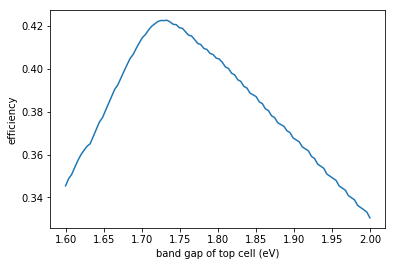

In [90]:
plt.plot(top_eg,eta)
plt.xlabel("band gap of top cell (eV)")
plt.ylabel("efficiency")
plt.savefig("sj_on_si.pdf")

In [36]:
top_eg[np.argmax(eta)]

1.7333333333333334

In [37]:
np.max(eta)

0.42269933447944541